In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("Credit_Card_Customer_Data[1].csv")
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [8]:
# df2=pd.read_csv('Mall_Customers[1].csv')
# df2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [23]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [22]:
df.drop(columns=["Sl_No",'Customer Key'],axis=1,inplace=True)

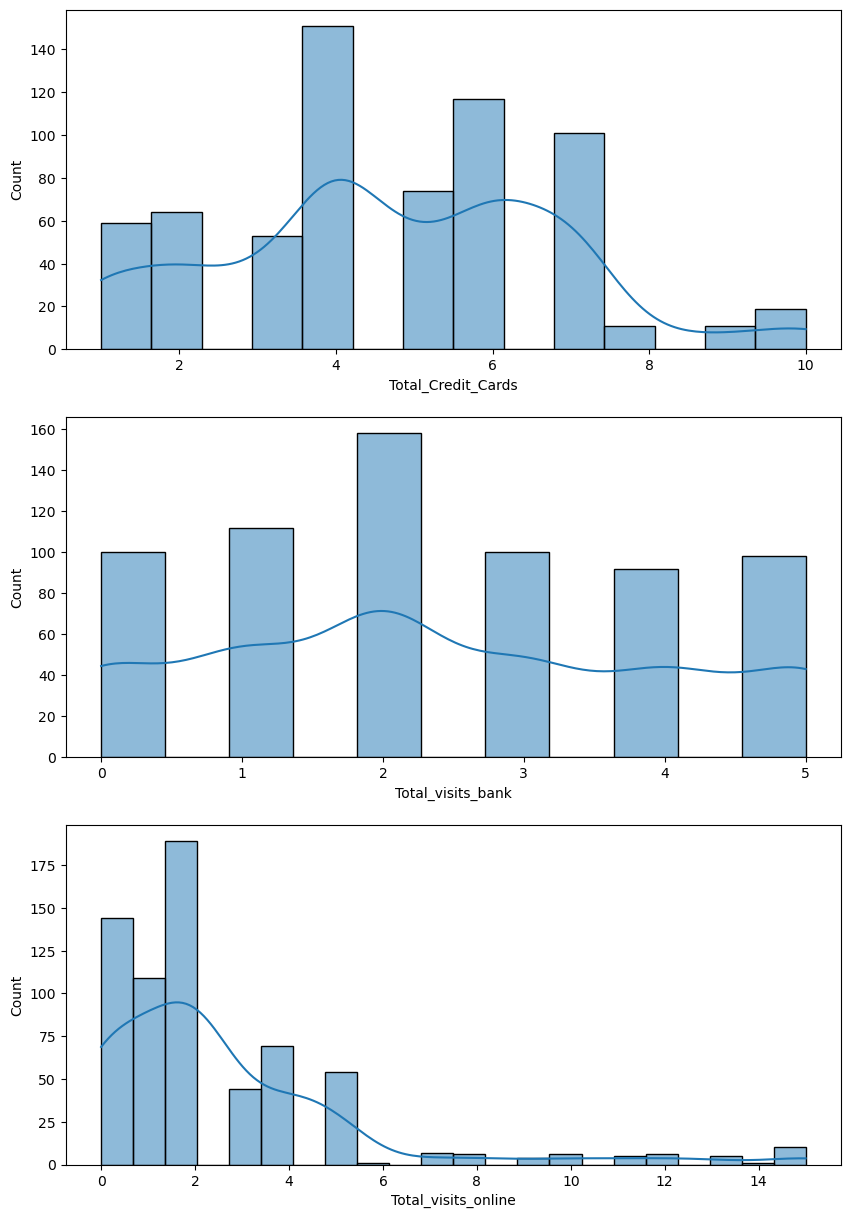

In [25]:
figure=plt.figure(figsize=(10,15))
for i in range(1,4):
    plt.subplot(3,1,i)
    sns.histplot(df.iloc[:,i],kde=True)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Converts data to a standardized format
X=pd.DataFrame(df_scaled,columns=df.columns)

# Elbow Technique

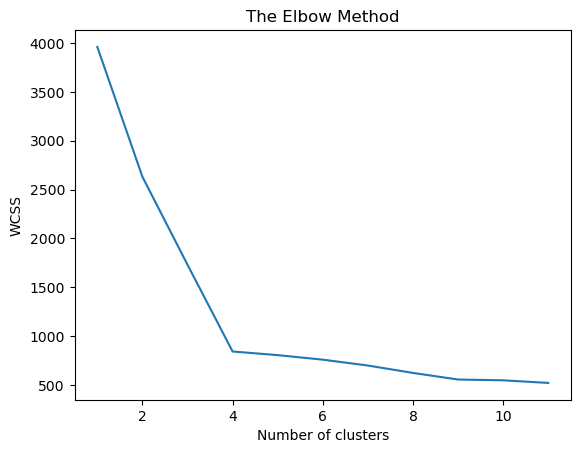

[3960.0000000000014, 2631.254207976147, 1731.635662377129, 843.8656182213415, 806.7276551957295, 760.3337714560537, 700.3696108320398, 624.6296225045284, 557.1198900406239, 549.0453172104835, 522.3380035937989] 11


In [34]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss, len(wcss))

### for Elbow method is the most popular method that is used to determine the optimal value of k.
that ids 4

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)

#Training the model
y_kmeans =model.fit(df)

In [45]:
label=model.labels_
print(label, len(label))

[3 2 2 2 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 3 3 2 2 3 3 2 3
 2 2 3 2 2 2 2 3 2 2 3 3 3 2 3 2 2 2 2 3 2 2 2 3 3 3 3 2 3 3 2 2 3 2 0 2 3
 3 2 3 3 2 2 2 2 2 3 0 2 2 2 3 3 0 2 3 2 2 2 3 2 2 3 2 2 2 0 2 2 3 2 2 2 2
 2 3 2 2 3 3 2 2 2 3 3 2 

## model has create the cluster with labels_(0,1,2,3)

### Interpretation of the Cluster Labels  

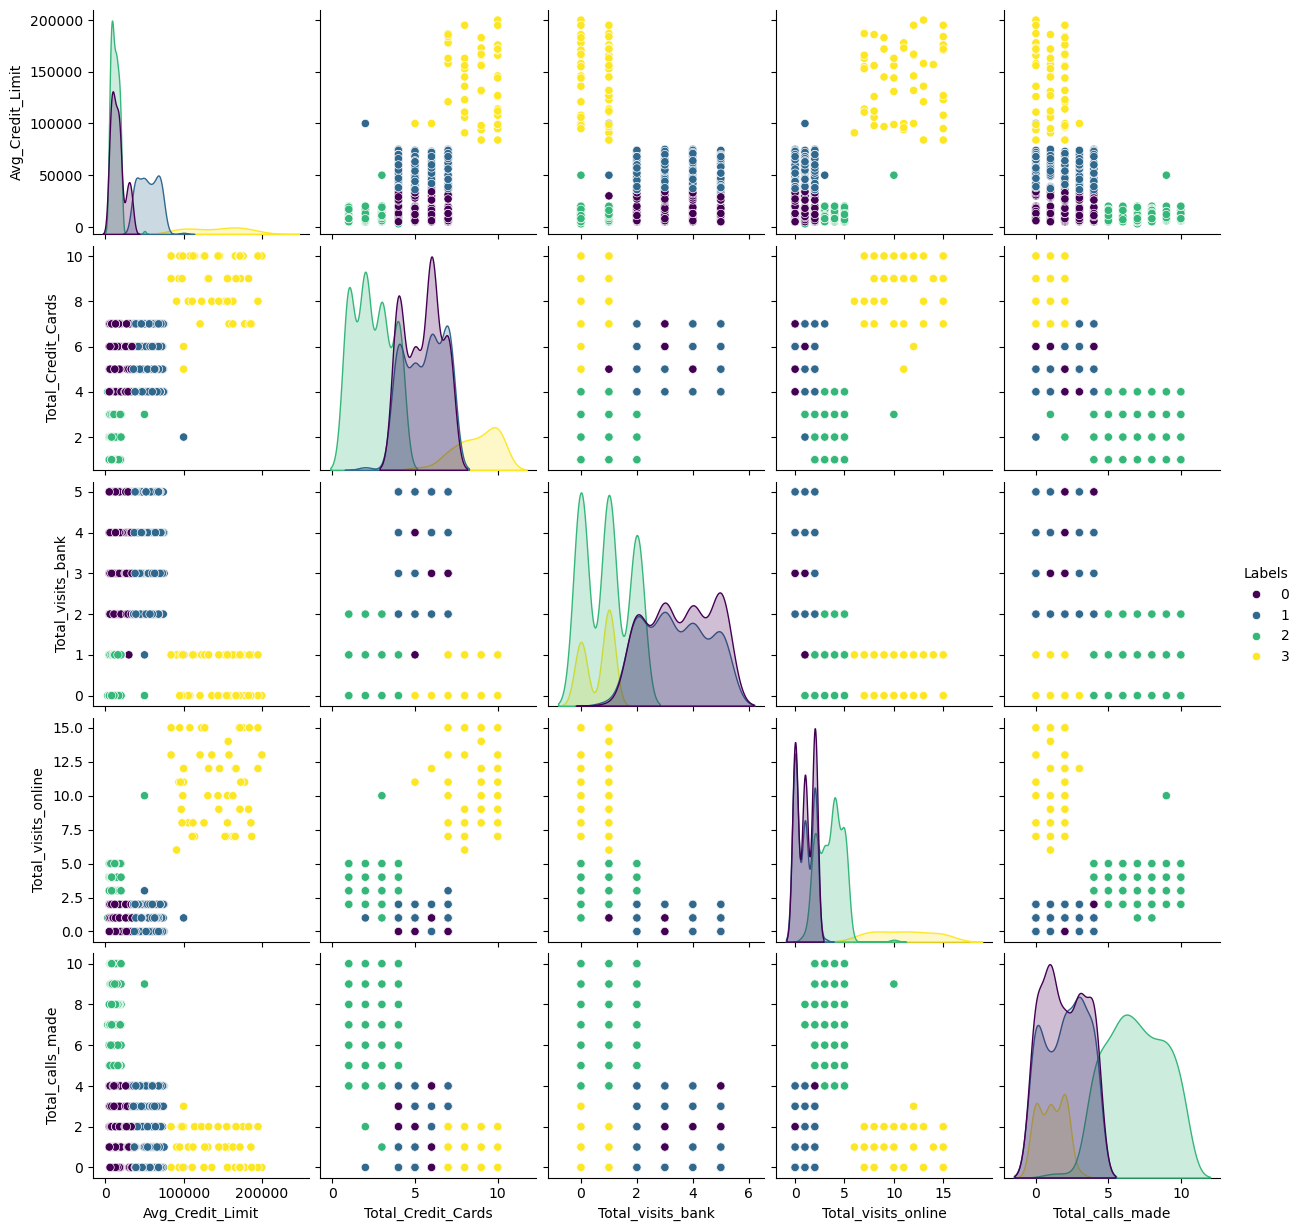

In [59]:
sns.pairplot(df, hue="Labels", palette="viridis")
plt.show()

In [48]:
df.groupby("Labels").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,12399.497487,3.758794,2.113065,2.417085,4.711055
1,160676.470588,8.676471,0.588235,11.147059,1.000000
2,41800.000000,5.533333,3.422222,1.059259,2.081481
3,72881.720430,6.107527,2.827957,2.537634,1.881720


## to find the mean of each of cluster ny perticuler columns